TensorFlow version: 2.20.0

PRAKTIKUM DASAR - Dummy Data

Data awal:
   luas  harga
0    50    500
1    60    600
2    70    700
3    80    800
4    90    900

Ukuran data training: (4, 1)
Ukuran data testing: (1, 1)


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

=== Hasil Prediksi Model Dasar ===
Luas (test): [60.]
Harga Aktual: [600.]
Harga Prediksi: [696.3926]
Loss terakhir: 0.6933

TUGAS 4 - Perbandingan Learning Rate

Training dengan learning rate = 0.001


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss akhir: 0.698188

Training dengan learning rate = 0.01
Loss akhir: 0.000012

Training dengan learning rate = 0.1
Loss akhir: 0.000001


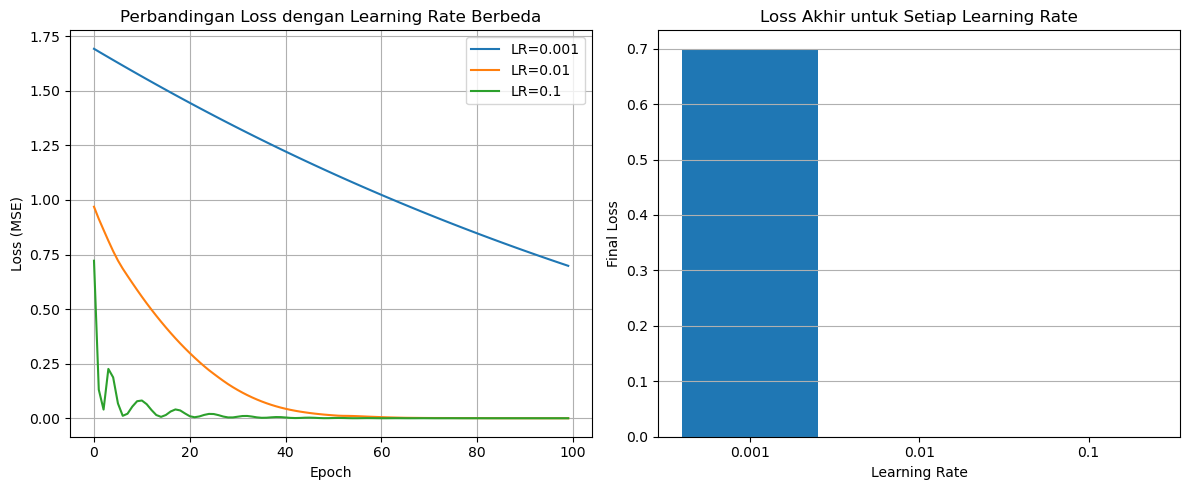


=== Ringkasan Perbandingan ===
Learning Rate 0.001: Loss Akhir = 0.698188
Learning Rate 0.01: Loss Akhir = 0.000012
Learning Rate 0.1: Loss Akhir = 0.000001

PRAKTIKUM - Boston Housing Dataset

Catatan: Dataset Boston deprecated, menggunakan data California Housing
atau Anda bisa download Boston dataset manual.

Boston dataset tidak tersedia, menggunakan California Housing sebagai alternatif
Ukuran dataset: (20640, 8)
Fitur: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target range: 0.15 - 5.00

Data training: (16512, 8)
Data validasi: (4128, 8)

=== Arsitektur Model ===


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Training selesai!


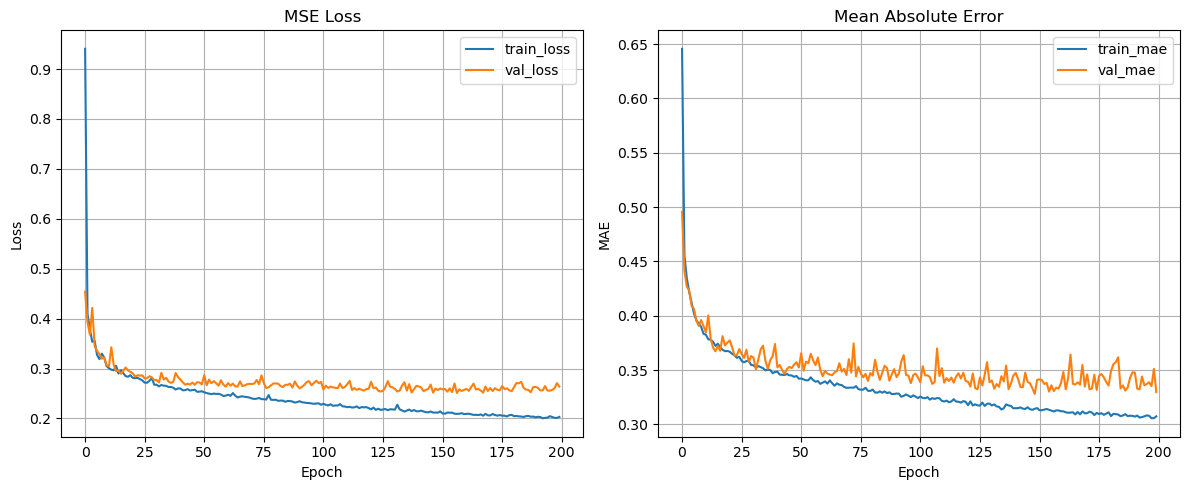


=== Hasil Evaluasi ===
RMSE: 0.5137
Final Train Loss: 0.2030
Final Val Loss: 0.2638
Final Train MAE: 0.3074
Final Val MAE: 0.3298


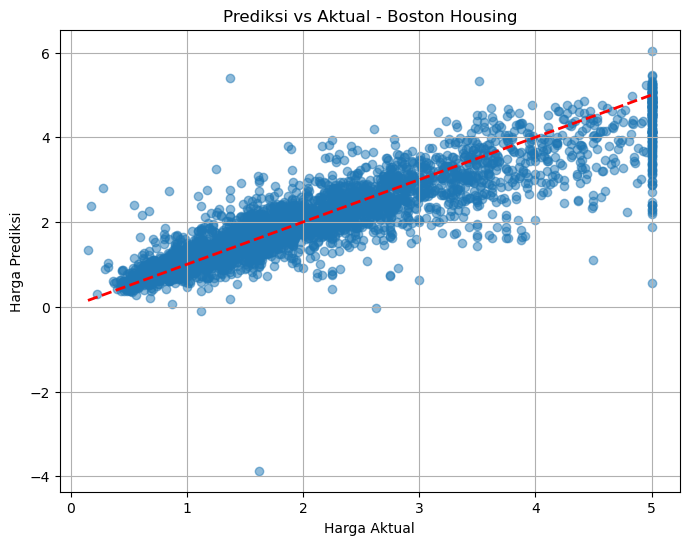


PRAKTIKUM SELESAI!


In [1]:
# Praktikum 3: Regresi dengan Keras - Prediksi Harga Rumah

## Bagian 1: Contoh Sederhana dengan Dummy Data

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

print("TensorFlow version:", tf.__version__)

# === PRAKTIKUM DASAR ===
print("\n" + "="*50)
print("PRAKTIKUM DASAR - Dummy Data")
print("="*50)

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

print("\nData awal:")
print(data)

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f"\nUkuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

# Model
model_dasar = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])

model_dasar.compile(optimizer='adam', loss='mse')
history_dasar = model_dasar.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluasi
prediksi_scaled = model_dasar.predict(X_test)
prediksi = scaler_y.inverse_transform(prediksi_scaled)
y_test_asli = scaler_y.inverse_transform(y_test)

print("\n=== Hasil Prediksi Model Dasar ===")
print(f"Luas (test): {scaler_X.inverse_transform(X_test).flatten()}")
print(f"Harga Aktual: {y_test_asli.flatten()}")
print(f"Harga Prediksi: {prediksi.flatten()}")
print(f"Loss terakhir: {history_dasar.history['loss'][-1]:.4f}")

# === TUGAS 4: UBAH LEARNING RATE ===
print("\n" + "="*50)
print("TUGAS 4 - Perbandingan Learning Rate")
print("="*50)

learning_rates = [0.001, 0.01, 0.1]
histories = {}
models = {}

for lr in learning_rates:
    print(f"\nTraining dengan learning rate = {lr}")
    
    # Build model baru untuk setiap learning rate
    model = Sequential([
        Dense(10, activation='relu', input_shape=(1,)),
        Dense(1)
    ])
    
    # Compile dengan learning rate yang berbeda
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    
    # Train
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Simpan
    histories[lr] = history
    models[lr] = model
    
    print(f"Loss akhir: {history.history['loss'][-1]:.6f}")

# Plot perbandingan
plt.figure(figsize=(12, 5))

# Plot 1: Loss curves
plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(histories[lr].history['loss'], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Perbandingan Loss dengan Learning Rate Berbeda')
plt.legend()
plt.grid(True)

# Plot 2: Final loss comparison
plt.subplot(1, 2, 2)
final_losses = [histories[lr].history['loss'][-1] for lr in learning_rates]
plt.bar([str(lr) for lr in learning_rates], final_losses)
plt.xlabel('Learning Rate')
plt.ylabel('Final Loss')
plt.title('Loss Akhir untuk Setiap Learning Rate')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print("\n=== Ringkasan Perbandingan ===")
for lr in learning_rates:
    final_loss = histories[lr].history['loss'][-1]
    print(f"Learning Rate {lr}: Loss Akhir = {final_loss:.6f}")

# === PRAKTIKUM BOSTON HOUSING ===
print("\n" + "="*50)
print("PRAKTIKUM - Boston Housing Dataset")
print("="*50)

# Note: load_boston deprecated, menggunakan alternatif
print("\nCatatan: Dataset Boston deprecated, menggunakan data California Housing")
print("atau Anda bisa download Boston dataset manual.")

try:
    from sklearn.datasets import load_boston
    data_boston = load_boston()
    X_boston = data_boston.data
    y_boston = data_boston.target
    feature_names = data_boston.feature_names
    print("\nBerhasil load Boston dataset")
except:
    print("\nBoston dataset tidak tersedia, menggunakan California Housing sebagai alternatif")
    from sklearn.datasets import fetch_california_housing
    data_boston = fetch_california_housing()
    X_boston = data_boston.data
    y_boston = data_boston.target
    feature_names = data_boston.feature_names

print(f"Ukuran dataset: {X_boston.shape}")
print(f"Fitur: {feature_names}")
print(f"Target range: {y_boston.min():.2f} - {y_boston.max():.2f}")

# Preprocess
scaler_boston = StandardScaler()
Xs_boston = scaler_boston.fit_transform(X_boston)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(
    Xs_boston, y_boston, test_size=0.2, random_state=42
)

print(f"\nData training: {X_train_b.shape}")
print(f"Data validasi: {X_val_b.shape}")

# Build model
model_boston = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_b.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_boston.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

print("\n=== Arsitektur Model ===")
model_boston.summary()

# Train
print("\nTraining model...")
h_boston = model_boston.fit(
    X_train_b, y_train_b, 
    validation_data=(X_val_b, y_val_b), 
    epochs=200, 
    batch_size=32, 
    verbose=0
)

print("Training selesai!")

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(h_boston.history['loss'], label='train_loss')
plt.plot(h_boston.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(h_boston.history['mae'], label='train_mae')
plt.plot(h_boston.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluasi
pred_boston = model_boston.predict(X_val_b, verbose=0)
rmse = np.sqrt(mean_squared_error(y_val_b, pred_boston))

print(f"\n=== Hasil Evaluasi ===")
print(f"RMSE: {rmse:.4f}")
print(f"Final Train Loss: {h_boston.history['loss'][-1]:.4f}")
print(f"Final Val Loss: {h_boston.history['val_loss'][-1]:.4f}")
print(f"Final Train MAE: {h_boston.history['mae'][-1]:.4f}")
print(f"Final Val MAE: {h_boston.history['val_mae'][-1]:.4f}")

# Visualisasi prediksi vs aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_val_b, pred_boston, alpha=0.5)
plt.plot([y_val_b.min(), y_val_b.max()], 
         [y_val_b.min(), y_val_b.max()], 
         'r--', lw=2)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual - Boston Housing')
plt.grid(True)
plt.show()

print("\n" + "="*50)
print("PRAKTIKUM SELESAI!")
print("="*50)